In [ ]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('~/Downloads/analysis_copy_sorted.csv')

df.columns = df.columns.str.strip()

df = df[['Index', 'inputlists', 'rdf', 'Rgavg', 'RgStd', 'AreaMean', 'AreaStd']].rename(
    columns={
        'Index': 'index',
        'inputlists': 'inputlist',
        'rdf': 'rdf',
        'Rgavg': 'rgavg',
        'RgStd': 'rgstd',
        'AreaMean': 'areaavg',
        'AreaStd': 'areastd'
    }, inplace=False
)
print(f"Total rows before cleaning: {len(df)}")
df.drop(index=10, inplace=True)
df.reset_index(drop=True, inplace=True)

df['inputlist'] = df['inputlist'].apply(ast.literal_eval)

df.drop_duplicates(subset=['inputlist'], inplace=True)
df = df[df['inputlist'].apply(len) <= 20]
df.reset_index(drop=True, inplace=True)
print("Cleaned DataFrame:")
df.head()
# print(f"Total rows after cleaning: {len(df)}")


Total rows before cleaning: 34
Cleaned DataFrame:


,index,inputlist,rdf,rgavg,rgstd,areaavg,areastd
0,1,"[(1, E9), (2, S9), (3, E9), (4, S9), (5, E9), ...",1.919,17.3603,0.0788,14397.02,1232.29
1,2,"[(1, S9), (2, S3), (3, E4), (4, S2), (5, E4), ...",1.83,18.2123,0.1656,14303.57,1666.8
2,3,"[(1, S9), (2, E9), (3, E9), (4, E9), (5, E9)...",1.895,18.4372,0.1604,17783.09,632.85
3,4,"[(1, S9), (2, S9), (3, S3), (4, S7), (5, E9), ...",1.753,18.3199,0.1804,15219.96,569.7
4,5,"[(1, E4), (2, E4), (3, E4), (4, E4), (5, E4), ...",1.768,17.567,0.1198,15999.02,535.59


In [19]:
def encode_label(label):
    if label.startswith('E'):
        suffix = label[1:]
        if suffix == '0':
            return -1.0
        else:
            return -float(suffix)
    elif label.startswith('S'):
        suffix = label[1:]
        if suffix == '0':
            return 1.0
        else:
            return float(suffix)
    # if label.startswith('E'):
    #     return -1.0
    # elif label.startswith('S'):
    #     return 1.0
    else:
        return 0.0

def inputlist_to_vectors_binary(inputlist, vector_length=20):
    if isinstance(inputlist, str):
        try:
            inputlist = ast.literal_eval(inputlist)
        except Exception:
            inputlist = []
    e_vector = [0.0] * vector_length
    s_vector = [0.0] * vector_length
    for pos, lab in inputlist:
        if pos <= vector_length:
            if lab.startswith('E'):
                e_vector[pos - 1] = encode_label(lab)
            elif lab.startswith('S'):
                s_vector[pos - 1] = encode_label(lab)
    return e_vector, s_vector

def inputlist_to_vector(inputlist, vector_length=20):
    if isinstance(inputlist, str):
        try:
            inputlist = ast.literal_eval(inputlist)
        except Exception:
            inputlist = []
    vector = [0.0] * vector_length
    for pos, lab in inputlist:
        if pos <= vector_length:
            vector[pos - 1] = encode_label(lab)
    return vector


In [20]:
import ast

def trim_inputlist(inputlist):
    if isinstance(inputlist, str):
        try:
            inputlist = ast.literal_eval(inputlist)
        except Exception:
            return []
    trimmed_list = [(pos, lab.strip()) for pos, lab in inputlist]
    return trimmed_list

df['inputlist'] = df['inputlist'].apply(trim_inputlist)
df['vector'] = df['inputlist'].apply(inputlist_to_vector)
df.head(10)



,index,inputlist,rdf,rgavg,rgstd,areaavg,areastd,vector
0,1,"[(1, E9), (2, S9), (3, E9), (4, S9), (5, E9), ...",1.919,17.3603,0.0788,14397.02,1232.29,"[-9.0, 9.0, -9.0, 9.0, -9.0, -9.0, -9.0, 9.0, ..."
1,2,"[(1, S9), (2, S3), (3, E4), (4, S2), (5, E4), ...",1.83,18.2123,0.1656,14303.57,1666.8,"[9.0, 3.0, -4.0, 2.0, -4.0, -5.0, 8.0, -4.0, -..."
2,3,"[(1, S9), (2, E9), (3, E9), (4, E9), (5, E9), ...",1.895,18.4372,0.1604,17783.09,632.85,"[9.0, -9.0, -9.0, -9.0, -9.0, -9.0, 9.0, 1.0, ..."
3,4,"[(1, S9), (2, S9), (3, S3), (4, S7), (5, E9), ...",1.753,18.3199,0.1804,15219.96,569.7,"[9.0, 9.0, 3.0, 7.0, -9.0, 3.0, -4.0, -3.0, -1..."
4,5,"[(1, E4), (2, E4), (3, E4), (4, E4), (5, E4), ...",1.768,17.567,0.1198,15999.02,535.59,"[-4.0, -4.0, -4.0, -4.0, -4.0, 5.0, 5.0, 5.0, ..."
5,6,"[(1, E9), (2, S9), (3, E9), (4, S9), (5, E9), ...",1.857,19.9225,0.1554,18106.2,646.6,"[-9.0, 9.0, -9.0, 9.0, -9.0, -9.0, -9.0, -9.0,..."
6,7,"[(1, S9), (2, E9), (3, E9), (4, S9), (5, E9), ...",1.798,18.6367,0.2205,16706.49,524.41,"[9.0, -9.0, -9.0, 9.0, -9.0, 8.0, 5.0, -1.0, 5..."
7,8,"[(1, E9), (2, E4), (3, E8), (4, E8), (5, E3), ...",1.862,18.9085,0.1871,13994.81,571.84,"[-9.0, -4.0, -8.0, -8.0, -3.0, -1.0, -6.0, -6...."
8,9,"[(1, E5), (2, E3), (3, E2), (4, E3), (5, E5), ...",1.841,18.7161,0.1457,14106.31,362.1,"[-5.0, -3.0, -2.0, -3.0, -5.0, -6.0, -8.0, -6...."
9,10,"[(1, E3), (2, E7), (3, E9), (4, E5), (5, E8), ...",1.888,18.8263,0.233,15332.12,429.88,"[-3.0, -7.0, -9.0, -5.0, -8.0, -8.0, -4.0, -8...."


In [22]:
import math
def sequence_charge_decoration(inputlist):
    N = len(inputlist)
    
    total_sum = 0
    for i in range(N):
        for j in range(i + 1, N):
            total_sum += inputlist[i] * inputlist[j] * math.sqrt(abs(j - i))
    
    SCD = total_sum / N
    print(inputlist[0], SCD)
    return SCD
df[['E_vector', 'S_vector']] = df['inputlist'].apply(lambda x: pd.Series(inputlist_to_vectors_binary(x, 20)))

df['E_vector'] = df['E_vector'].apply(lambda vec: [num for num in vec if num != 0])
df['S_vector'] = df['S_vector'].apply(lambda vec: [num for num in vec if num != 0])

df['SCDE'] = df['E_vector'].apply(sequence_charge_decoration)
df['SCDS'] = df['S_vector'].apply(sequence_charge_decoration)
df['SCD'] = df['vector'].apply(sequence_charge_decoration)
df['SCDe/s'] = df['SCDE']/df['SCDS']
df['SCDs/e'] = df['SCDS']/df['SCDE']
# print(df)

-9.0 239.89403573706807
-4.0 145.45971391390628
-9.0 297.734839845817
-9.0 53.00761807626178
-4.0 131.21675390925554
-9.0 553.0609758986153
-9.0 138.48537904597222
-9.0 242.2101750683154
-5.0 176.38194105222863
-3.0 281.2769991628089
-7.0 174.6642537413108
-4.0 131.21675390925554
-4.0 131.21675390925554
-10.0 189.01194830787668
-20.0 200.0
-30.0 150.0
-40.0 0.0
-80.0 0.0
-4.0 75.24776397696857
-4.0 30.24191172926027
-4.0 18.209138999323173
-4.0 18.209138999323173
-4.0 131.21675390925554
-5.0 130.76941113384902
-6.0 129.42738280762956
-7.0 127.19066893059703
-8.0 175.4463014688901
-4.0 131.21675390925554
-1.0 106.75160212342465
-7.0 106.75160212342462
-1.0 8.201047119328472
-7.0 401.8513088470951
9.0 109.5130006943085
9.0 176.38383080344806
9.0 172.71724299446456
9.0 180.82482572322135
5.0 205.0261779832118
9.0 141.71529605694712
9.0 200.09760556923297
5.0 149.90817640510463
5.0 176.0671771941582
5.0 166.41417693114036
5.0 205.0261779832118
5.0 205.0261779832118
5.0 205.0261779832118
5.

In [ ]:
from scipy.stats import skew
import numpy as np
import pandas as pd
import ast

def encode_label(label):
    if label.startswith('E'):
        suffix = label[1:]
        return -1.0 if suffix == '0' else -float(suffix)
    elif label.startswith('S'):
        suffix = label[1:]
        return 1.0 if suffix == '0' else float(suffix)
    else:
        return 0.0

def compute_charge_metrics(inputlist):
    if isinstance(inputlist, str):
        try:
            inputlist = ast.literal_eval(inputlist)
        except Exception:
            return pd.Series([np.nan]*11, index=[
                'E_count', 'S_count', 'E/S_ratio', 'S/E_ratio', 'SCD', 'Blockness_Index',
                'skew_E', 'skew_S', 'skew_E_by_S', 'skew_S_by_E', 'Charge_skewness'
            ])

    charges = np.array([encode_label(lab) for _, lab in inputlist])

    E_count = np.sum(charges[charges < 0])
    S_count = np.sum(charges[charges > 0])

    E_S_ratio = E_count / S_count if S_count != 0 else np.nan
    S_E_ratio = S_count / E_count if E_count != 0 else np.nan

    transitions = np.sum(np.diff(charges) != 0)
    BI = transitions / (len(charges) - 1) if len(charges) > 1 else np.nan

    N = len(charges)
    total_sum = 0
    for i in range(N):
        for j in range(i + 1, N):
            total_sum += charges[i] * charges[j] * np.sqrt(abs(j - i))

    SCD = total_sum / N if N > 0 else np.nan

    E_charges = charges[charges < 0]
    S_charges = charges[charges > 0]

    skew_E = skew(E_charges) if len(E_charges) > 1 else np.nan
    skew_S = skew(S_charges) if len(S_charges) > 1 else np.nan

    skew_E_by_S = skew_E / skew_S if skew_S not in [0, np.nan] else np.nan
    skew_S_by_E = skew_S / skew_E if skew_E not in [0, np.nan] else np.nan
    overall_skewness = skew(charges) if len(charges) > 1 else np.nan

    return pd.Series([
        E_count, S_count, E_S_ratio, S_E_ratio, SCD, BI,
        skew_E, skew_S, skew_E_by_S, skew_S_by_E, overall_skewness
    ], index=[
        'E_count', 'S_count', 'E/S_ratio', 'S/E_ratio', 'SCD', 'Blockness_Index',
        'skew_E', 'skew_S', 'skew_E_by_S', 'skew_S_by_E', 'Charge_skewness'
    ])

# Example application:
df[['E_count', 'S_count', 'E/S_ratio', 'S/E_ratio', 'SCD', 'Blockness_Index',
    'skew_E', 'skew_S', 'skew_E_by_S', 'skew_S_by_E', 'Charge_skewness']] = df['inputlist'].apply(compute_charge_metrics)


/var/folders/wt/5g835yws6rnfnlq9ffc7ccfr0000gn/T/ipykernel_9136/1745042635.py:109: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_E = skew(E_charges) if len(E_charges) > 1 else np.nan
/var/folders/wt/5g835yws6rnfnlq9ffc7ccfr0000gn/T/ipykernel_9136/1745042635.py:110: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_S = skew(S_charges) if len(S_charges) > 1 else np.nan


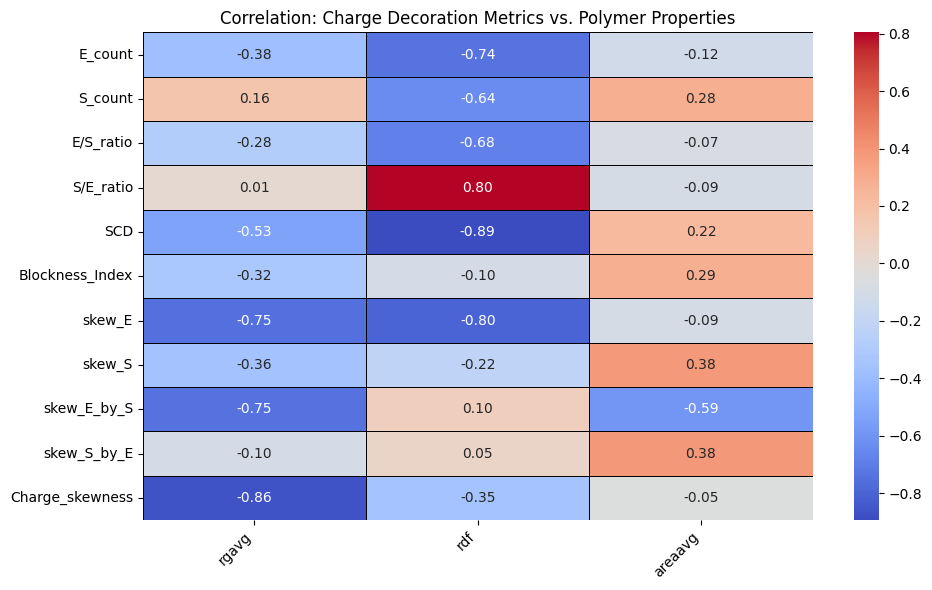

In [30]:
input_features = ['E_count', 'S_count', 'E/S_ratio', 'S/E_ratio', 'SCD', 'Blockness_Index',
    'skew_E', 'skew_S', 'skew_E_by_S', 'skew_S_by_E', 'Charge_skewness']
output_cols = ['rgavg', 'rdf', 'areaavg']


corr_matrix = df[input_features + output_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.loc[input_features, output_cols], annot=True, cmap="coolwarm", fmt=".2f", linecolor="black", linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.title("Correlation: Charge Decoration Metrics vs. Polymer Properties")
plt.tight_layout()
plt.show()

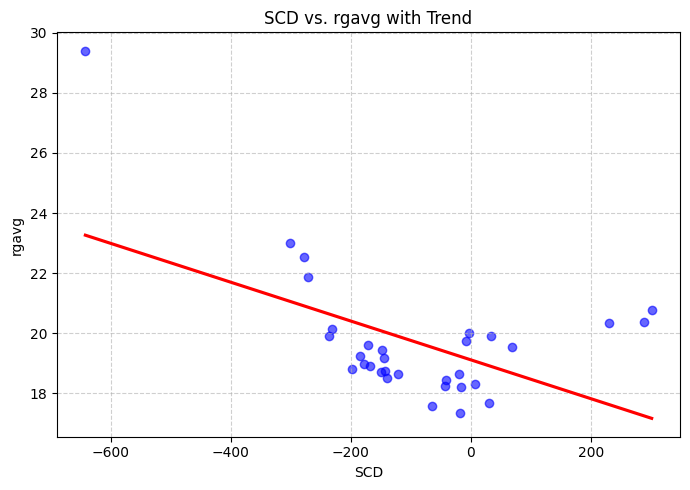

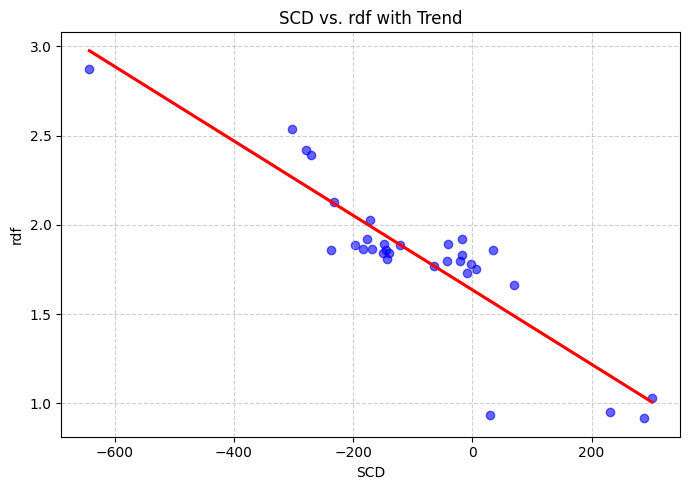

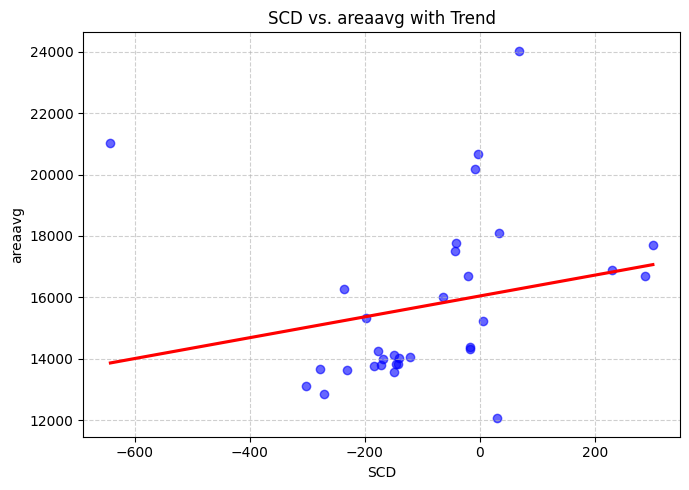

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define input skewness features and output metrics
skew_features = ['SCD']
output_cols = ['rgavg', 'rdf', 'areaavg']

# Loop through each skew feature and each output feature
for skew_feat in skew_features:
    for out_feat in output_cols:
        plt.figure(figsize=(7, 5))
        
        # Scatter plot with linear regression trend line (no confidence interval)
        sns.regplot(data=df, x=skew_feat, y=out_feat, 
                    scatter_kws={'color':'blue', 'alpha':0.6}, 
                    line_kws={'color':'red'}, ci=None)
        
        plt.title(f"{skew_feat} vs. {out_feat} with Trend")
        plt.xlabel(skew_feat)
        plt.ylabel(out_feat)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

input_features = ['E_count', 'S_count', 'E/S_ratio', 'average_net_charge',
                  'Blockness_Index', 'Charge_skewness', 'SCDE', 'SCDS', 'SCD', 'SCDe/s', 'SCDs/e']
output_features = ['rgavg', 'rdf', 'areaavg']

df_model = df[input_features + output_features].dropna()

X = df_model[input_features].values
y = df_model[output_features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test, dtype=torch.float32)

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.model(x)

model = MLP(input_dim=len(input_features), output_dim=len(output_features))

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        model.eval()
        with torch.no_grad():
            val_loss = criterion(model(X_test_tensor), y_test_tensor)
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {val_loss.item():.4f}")

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

print("\nSample Predictions (first 5):")
print("Predicted:", predictions[:5])
print("Actual   :", y_test[:5])
